<a href="https://colab.research.google.com/github/ankitaattavar/Chennai-House-Price-Prediction/blob/main/chennai_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/chennai_sales.csv')

Mounted at /content/gdrive


In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 22)

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
df = df.drop(columns=['PRT_ID'])
df.head(2)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


In [8]:
df.AREA.nunique()

17

In [9]:
df.AREA.unique() #there are spelling mistakes in the data

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [10]:
df["AREA"]=df["AREA"].replace({"Adyr":"Adyar","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","Karapakam":"Karapakkam","Velchery":"Velachery","Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet","KKNagar":"KK Nagar","TNagar":"T Nagar"})

In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

(array([  92.,  548., 1439., 1794., 1412., 1003.,  291.,  227.,  222.,
          81.]),
 array([ 2156875. ,  4307921.5,  6458968. ,  8610014.5, 10761061. ,
        12912107.5, 15063154. , 17214200.5, 19365247. , 21516293.5,
        23667340. ]),
 <a list of 10 Patch objects>)

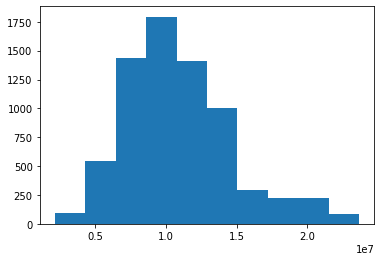

In [12]:
plt.hist(df['SALES_PRICE'])

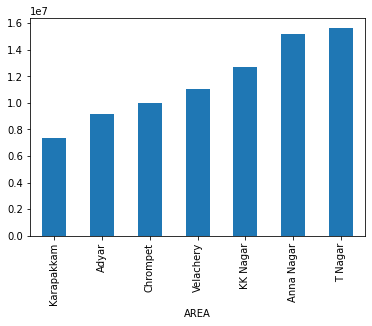

In [13]:
df.groupby(["AREA"])["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()
# From the graph below it is observed that T nagar has the highest sales price

In [14]:
Area={"Karapakkam":0,"Adyar":1,"Chrompet":2,"Velachery":3,"KK Nagar":4,"Anna Nagar": 5,"T Nagar":6}

In [15]:
df['AREA']=df['AREA'].replace(Area)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,0,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,5,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,1,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,3,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,0,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


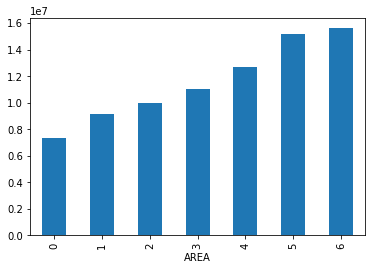

In [16]:
df.groupby(["AREA"])["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

INT_SQFT


In [17]:
df.INT_SQFT.isnull().sum()

0

(array([ 339.,  962., 1040., 1045.,  421., 1270., 1087.,  597.,  164.,
         184.]),
 array([ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
        2300., 2500.]),
 <a list of 10 Patch objects>)

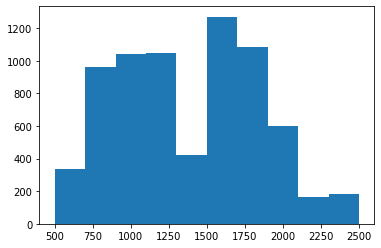

In [18]:
plt.hist(df['INT_SQFT'])

In [19]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [20]:
#Checking for outliers
q3=df.INT_SQFT.quantile(0.75)
q3

1744.0

In [21]:
q1=df.INT_SQFT.quantile(0.25)
q1

993.0

In [22]:
iqr=q3-q1
iqr

751.0

In [23]:
max_threshold=q3+1.5*iqr
max_threshold

2870.5

There are no houses with prices beyond this range as you can see from the descriptive statistics. Hence, we can conclude that there are no outliers

In [24]:
min_threshold=q1-1.5*iqr
min_threshold
#There are no houses with prices beyond this range as you can see from the descriptive statistics. Hence, we van conclude that there are no outliers

-133.5

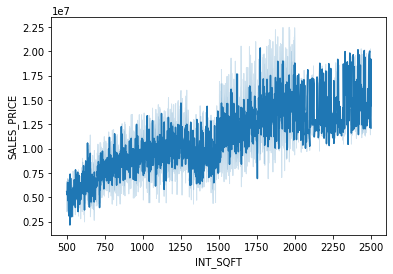

In [25]:
sns.lineplot(x = 'INT_SQFT',y = 'SALES_PRICE',data = df)
plt.show()
# The sales price increases as the square feet increases

DATE SALE


In [26]:
#df.DATE_SALE.dtype
df.dtypes

AREA               int64
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [27]:
#Converting to datetime format
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df.DATE_SALE.dtype
df.dtypes

AREA                      int64
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD               object
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [28]:
#Starting and end dates
df["DATE_SALE"].min(), df["DATE_SALE"].max()

(Timestamp('2004-01-02 00:00:00'), Timestamp('2015-12-02 00:00:00'))

In [29]:
#extracting the year from the date column
df['sale_year']=df.DATE_SALE.dt.year
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year
0,0,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011
1,5,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006
2,1,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012
3,3,1855,2010-03-13,14,3.0,2.0,5,Family,No,18-03-1988,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010
4,0,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009


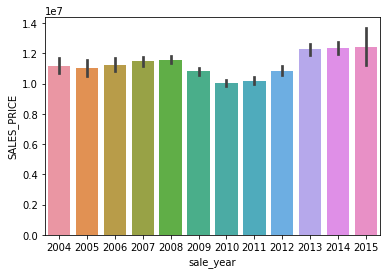

In [30]:
sns.barplot(x = 'sale_year',y = 'SALES_PRICE',data = df)
plt.show()

In [31]:
df.sale_year.isnull().sum() 
#there are no missing values

0

DIST_MAINROAD

In [32]:
df.DIST_MAINROAD.isnull().sum() # no missing  values

0

In [33]:
df.DIST_MAINROAD.dtype

dtype('int64')

(array([690., 712., 689., 753., 731., 741., 685., 709., 667., 732.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

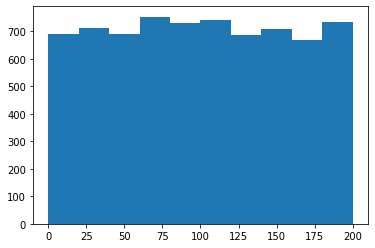

In [34]:
plt.hist(df['DIST_MAINROAD'])

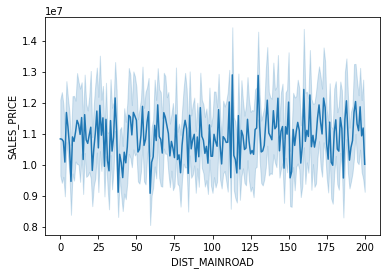

In [35]:
sns.lineplot(x='DIST_MAINROAD', y='SALES_PRICE', data=df)
plt.show()

In [36]:
#N_BEDROOM
df.N_BEDROOM.dtype

dtype('float64')

In [37]:
df.N_BEDROOM.isnull().sum()
df.N_BEDROOM.head()

0    1.0
1    2.0
2    1.0
3    3.0
4    1.0
Name: N_BEDROOM, dtype: float64

In [38]:
x=df.N_BEDROOM.mode()#replacing missing values with mode
df.N_BEDROOM.fillna(int(x),inplace=True)
#df['N_BEDROOM']=df['N_BEDROOM'].astype(int)
#df.N_BEDROOM.isnull().sum()

In [39]:
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)

In [40]:
df.N_BEDROOM.isnull().sum()

0

In [41]:
df.N_BEDROOM.dtype

dtype('int64')

(array([3796.,    0.,    0., 2352.,    0.,    0.,  707.,    0.,    0.,
         254.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

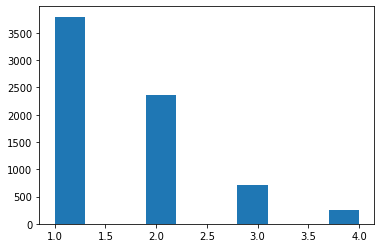

In [42]:
plt.hist(df['N_BEDROOM'])

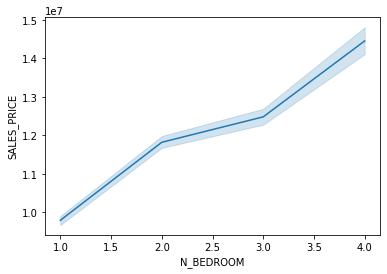

In [43]:
sns.lineplot(data=df, x="N_BEDROOM", y="SALES_PRICE") #sales price increases with increase in no of bedrooms

N_BATHROOM


In [44]:
df.N_BATHROOM.dtype

dtype('float64')

In [45]:
df.N_BATHROOM.head()

0    1.0
1    1.0
2    1.0
3    2.0
4    1.0
Name: N_BATHROOM, dtype: float64

In [46]:
df.N_BATHROOM.isnull().sum()

5

In [47]:
x1=df.N_BATHROOM.mode()#replacing missing values with mode
df.N_BATHROOM.fillna(int(x1),inplace=True)

In [48]:
df.N_BATHROOM.isnull().sum()

0

In [49]:
#df.N_BATHROOM.head()
df['N_BATHROOM']=df['N_BATHROOM'].astype(int)

In [50]:
df.N_BATHROOM.dtype

dtype('int64')

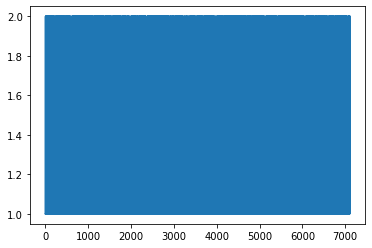

In [51]:
plt.plot(df['N_BATHROOM'])

In [52]:
df.N_BATHROOM.describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

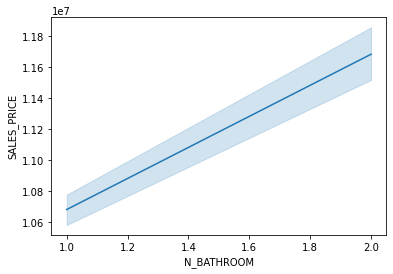

In [53]:
sns.lineplot(data=df, x="N_BATHROOM", y="SALES_PRICE")# there is a linear relationship between sales price and N_bathroom

N_ROOM

In [54]:
df.N_ROOM.dtype

dtype('int64')

In [55]:
df.N_ROOM.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


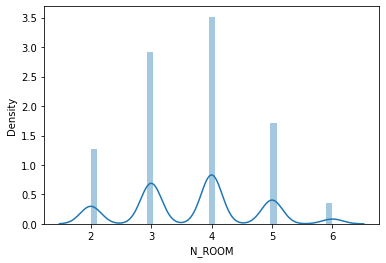

In [56]:
sns.distplot(df['N_ROOM'])

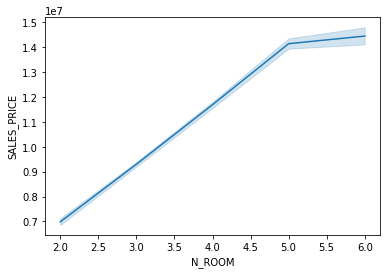

In [57]:
sns.lineplot(data=df, x="N_ROOM", y="SALES_PRICE")

SALE_COND


In [58]:
df.SALE_COND.dtype

dtype('O')

In [59]:
df.SALE_COND.isnull().sum()

0

In [60]:
df.SALE_COND.unique() # there are a few spelling mistakes

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [61]:
df.SALE_COND.nunique()

9

In [62]:
df["SALE_COND"]=df["SALE_COND"].replace({"Ab Normal":"AbNormal","PartiaLl":"Partial","Adj Land":"AdjLand","Partiall":"Partial"})


In [63]:
df.SALE_COND.unique()


array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

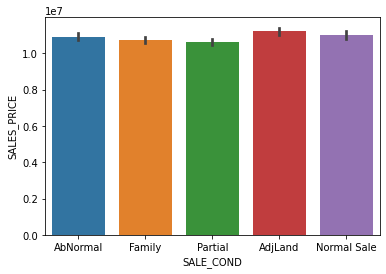

In [64]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df)

In [65]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

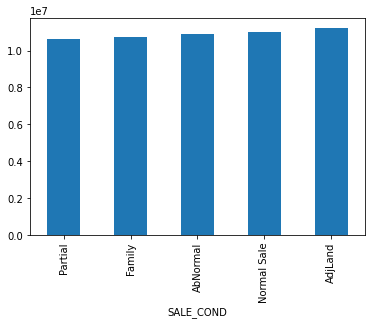

In [66]:
#encoding
df.groupby(["SALE_COND"])["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

In [67]:
sale_con={"Partial":0,"Family":1,"AbNormal":2,"Normal Sale":3,"AdjLand":4}

In [68]:
df['SALE_COND']=df['SALE_COND'].replace(sale_con)

In [69]:
df.SALE_COND.unique()

array([2, 1, 0, 4, 3])

PARK_FACIL


In [70]:
df.PARK_FACIL.dtype

dtype('O')

In [71]:
df.PARK_FACIL.isnull().sum()

0

In [72]:
df.PARK_FACIL.unique() # there are spelling mistakes
#df['AREA']=df['AREA'].replace(Area)

array(['Yes', 'No', 'Noo'], dtype=object)

In [73]:
df["PARK_FACIL"]=df["PARK_FACIL"].replace({"Noo":"No"})

In [74]:
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [75]:
#Encoding
PARK_FACIL={"Yes":1,"No":0}

In [76]:
df['PARK_FACIL']=df['PARK_FACIL'].replace(PARK_FACIL)

In [77]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year
0,0,1004,2011-04-05,131,1,1,3,2,1,15-05-1967,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011
1,5,1986,2006-12-19,26,2,1,5,2,0,22-12-1995,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006
2,1,909,2012-04-02,70,1,1,3,2,1,09-02-1992,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012
3,3,1855,2010-03-13,14,3,2,5,1,0,18-03-1988,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010
4,0,1226,2009-05-10,84,1,1,3,2,1,13-10-1979,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


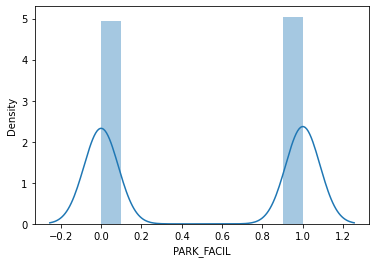

In [78]:
#plt.plot(df['PARK_FACIL'])
sns.distplot(df['PARK_FACIL'])

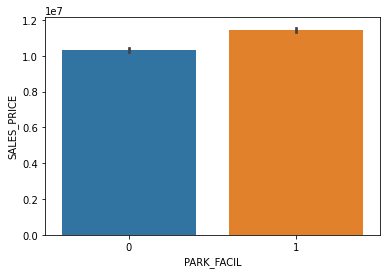

In [79]:
sns.barplot(data=df,x='PARK_FACIL',y='SALES_PRICE')
#sales price is higher when there is a parking facility

DATE_BUILD


In [80]:
df['DATE_BUILD'].dtype

dtype('O')

In [81]:
#Converting to datetime format
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
#df.DATE_SALE.dtype
#df.dtypes

In [82]:
df.DATE_BUILD.dtype

dtype('<M8[ns]')

In [83]:
df.DATE_BUILD.isnull().sum()

0

In [84]:
#Starting and end dates
df["DATE_BUILD"].min(), df["DATE_BUILD"].max()

(Timestamp('1949-10-28 00:00:00'), Timestamp('2010-12-11 00:00:00'))

In [85]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009


In [86]:
df['building_age']=df['DATE_SALE']-df['DATE_BUILD']

In [87]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year,building_age
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,16031 days
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,4015 days
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,7152 days
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,8030 days
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,10802 days


In [88]:
df["building_age"]=(df.building_age)/np.timedelta64(1,'Y')

In [89]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year,building_age
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,43.891387
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,10.992697
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,19.581511
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,21.985393
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,29.574871


In [90]:
df['building_age']= df['building_age'].astype(int)

In [91]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year,building_age
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,43
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,10
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,19
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,21
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,29


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


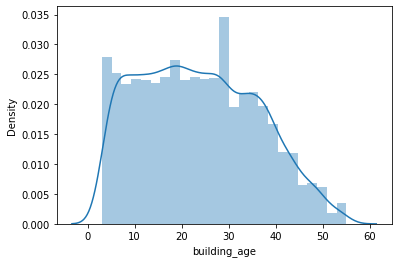

In [92]:
sns.distplot(df['building_age'])

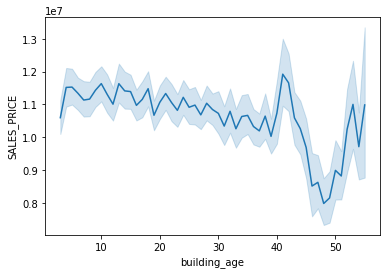

In [93]:
sns.lineplot(data=df, x='building_age',y='SALES_PRICE')

MZZONE

In [94]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [95]:
df.MZZONE.isnull().sum()

0

In [96]:
df.MZZONE.head()

0     A
1    RH
2    RL
3     I
4     C
Name: MZZONE, dtype: object

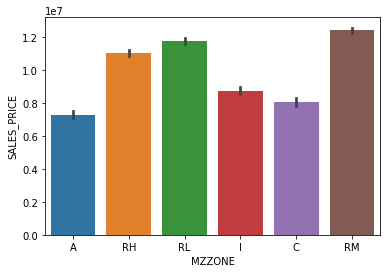

In [97]:
sns.barplot(data=df,x='MZZONE',y='SALES_PRICE')

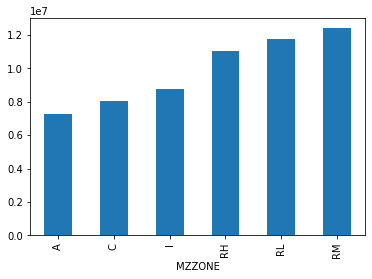

In [98]:
df.groupby(["MZZONE"])["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar() #The sales price is highest in the RM zone and lowest in zone A

In [99]:
#encoding MZZONE
mzzone={"A":0,"C":1,"I":2,"RH":3,"RL":4,"RM": 5}

In [100]:
df['MZZONE']=df['MZZONE'].replace(mzzone)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year,building_age
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,...,0,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,43
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,...,3,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,10
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,...,4,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,19
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,...,2,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,21
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,...,1,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,29


STREET


In [101]:
df.STREET.dtype

dtype('O')

In [102]:
df.STREET.isnull().sum()

0

In [103]:
df.STREET.unique() # there are spelling mistakes

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [104]:
df.STREET.head()

0     Paved
1    Gravel
2    Gravel
3     Paved
4    Gravel
Name: STREET, dtype: object

In [105]:
df['STREET']=df['STREET'].replace({"Pavd":"Paved","NoAccess":"No Access"})

In [106]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

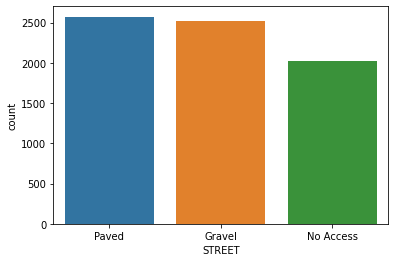

In [107]:
sns.countplot(data=df,x='STREET')#most of the buidings have paved streets

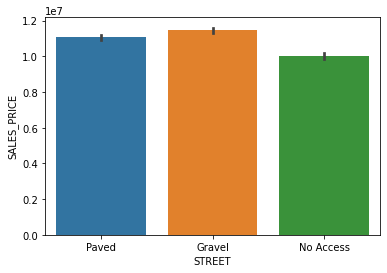

In [108]:
sns.barplot(data=df,x='STREET',y='SALES_PRICE')

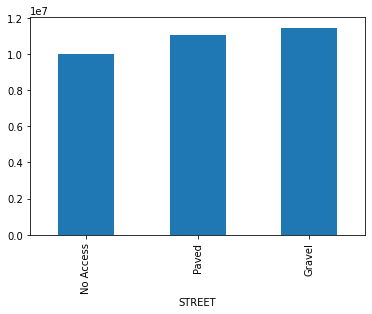

In [109]:
df.groupby(["STREET"])["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

In [110]:
#encoding the street variable
street={'No Access':0,'Paved':1,'Gravel':2}

In [111]:
df['STREET']=df['STREET'].replace(street)

In [112]:
df.STREET.head()

0    1
1    2
2    2
3    1
4    2
Name: STREET, dtype: int64

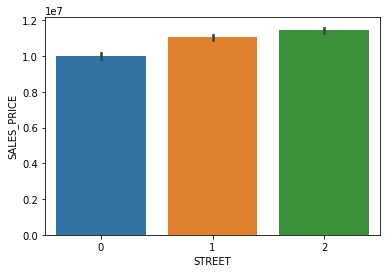

In [113]:
sns.barplot(data=df,x='STREET',y='SALES_PRICE')

In [114]:
df.dtypes

AREA                      int64
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                 int64
PARK_FACIL                int64
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                    int64
MZZONE                    int64
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
sale_year                 int64
building_age              int64
dtype: object

In [115]:
df.BUILDTYPE.unique() 

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [116]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'}) #Correcting the spelling mistakes

In [117]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [118]:
df.BUILDTYPE.isnull().sum()

0

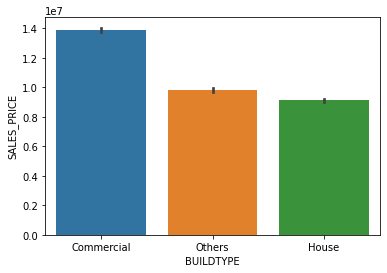

In [119]:
sns.barplot(data=df,x='BUILDTYPE',y='SALES_PRICE') # we can observe that the sales price of commercial properties is the highest

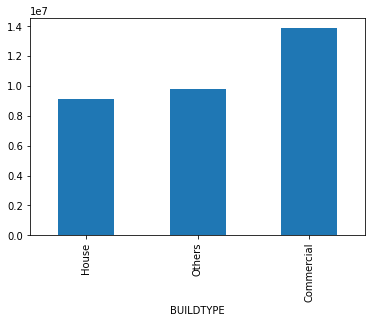

In [120]:

df.groupby(["BUILDTYPE"])["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

In [121]:
#encoding buildtype
df['BUILDTYPE']=df['BUILDTYPE'].replace({'House':0,'Others':1,'Commercial':2})

In [122]:
df.BUILDTYPE.unique()

array([2, 1, 0])

UTILITY_AVAIL

In [123]:
df.UTILITY_AVAIL.isnull().sum()

0

In [124]:
df.UTILITY_AVAIL.dtype

dtype('O')

In [125]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [126]:
util={'All Pub':'AllPub'}

In [127]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(util)

In [128]:
df.UTILITY_AVAIL.unique()# Correcting the spelling mistakes

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

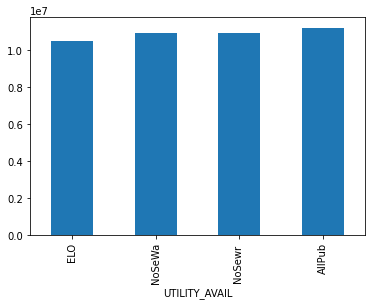

In [129]:
df.groupby(["UTILITY_AVAIL"])["SALES_PRICE"].mean().sort_values(ascending=True).plot.bar()

In [134]:
df.columns


Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'sale_year', 'building_age'],
      dtype='object')

In [135]:
#dropping unnecessary columns
df.drop(columns=['REG_FEE','COMMIS','DATE_SALE','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','sale_year'],inplace=True)

In [136]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'SALES_PRICE', 'building_age'],
      dtype='object')

In [137]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,building_age
0,0,1004,131,1,1,3,2,1,2,AllPub,1,0,7600000,43
1,5,1986,26,2,1,5,2,0,2,AllPub,2,3,21717770,10
2,1,909,70,1,1,3,2,1,2,ELO,2,4,13159200,19
3,3,1855,14,3,2,5,1,0,1,NoSewr,1,2,9630290,21
4,0,1226,84,1,1,3,2,1,1,AllPub,2,1,7406250,29


In [138]:
df1 = pd.get_dummies(df,drop_first=True) #one hot encoding
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,STREET,MZZONE,SALES_PRICE,building_age,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr
0,0,1004,131,1,1,3,2,1,2,1,0,7600000,43,0,0,0
1,5,1986,26,2,1,5,2,0,2,2,3,21717770,10,0,0,0
2,1,909,70,1,1,3,2,1,2,2,4,13159200,19,1,0,0
3,3,1855,14,3,2,5,1,0,1,1,2,9630290,21,0,0,1
4,0,1226,84,1,1,3,2,1,1,2,1,7406250,29,0,0,0


In [148]:
df1.corr()['SALES_PRICE'].sort_values(ascending=False) # from the abservations below we can conclude that area,int_sqft and N-rooms have a high correlation with sales price

SALES_PRICE              1.000000
AREA                     0.694149
INT_SQFT                 0.612125
N_ROOM                   0.602760
BUILDTYPE                0.515717
MZZONE                   0.427789
N_BEDROOM                0.330987
STREET                   0.149589
PARK_FACIL               0.146428
N_BATHROOM               0.108834
SALE_COND                0.054370
DIST_MAINROAD            0.018783
UTILITY_AVAIL_NoSewr     0.004818
UTILITY_AVAIL_NoSeWa    -0.000290
UTILITY_AVAIL_ELO       -0.058934
building_age            -0.119192
Name: SALES_PRICE, dtype: float64

In [140]:
#Training the model 
x = df1.drop('SALES_PRICE',axis=1)
y = df1.SALES_PRICE

In [141]:
x.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,STREET,MZZONE,building_age,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr
0,0,1004,131,1,1,3,2,1,2,1,0,43,0,0,0
1,5,1986,26,2,1,5,2,0,2,2,3,10,0,0,0
2,1,909,70,1,1,3,2,1,2,2,4,19,1,0,0
3,3,1855,14,3,2,5,1,0,1,1,2,21,0,0,1
4,0,1226,84,1,1,3,2,1,1,2,1,29,0,0,0


In [144]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [145]:
#Scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

In [149]:
lr = LinearRegression()
model = lr.fit(x_train_scaled, y_train)

In [151]:
y_pred = lr.predict(x_test_scaled) 
y_pred

array([13696333.0889301 , 14685379.58113821, 18122671.38015376, ...,
       13732244.75454642,  9736629.03914966,  4946161.35655565])

In [152]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
3913,13376150,1.369633e+07
2726,12857440,1.468538e+07
6220,19124310,1.812267e+07
2716,4905000,5.277818e+06
5459,13534450,1.268358e+07
...,...,...
549,7511125,9.015869e+06
6275,9414770,1.077081e+07
6772,13614160,1.373224e+07
2861,8415125,9.736629e+06


In [154]:
lr.coef_

array([ 1.07200382e+06,  6.43743194e+05, -3.27796612e+02, -1.26920216e+06,
        1.20414516e+05,  1.77923619e+06,  2.14012290e+05,  5.21239392e+05,
        1.91063706e+06,  4.13197474e+05,  8.92001938e+05, -2.17057913e+05,
       -5.87113597e+04, -1.34406395e+05, -9.34596972e+04])

In [155]:
lr.intercept_

10940154.88243569

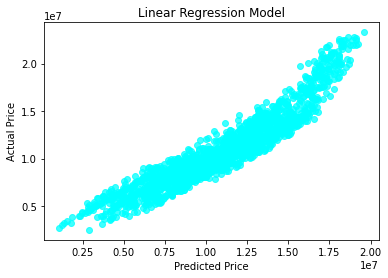

In [156]:
plt.scatter(y_pred,y_test,alpha=0.75,color='cyan')
plt.title('Linear Regression Model')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()


In [157]:
from sklearn import metrics 
print('R2-SCORE:', metrics.r2_score(y_test,y_pred)) 

R2-SCORE: 0.8794397106818443


RANDOM FOREST REGRESSOR


In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
random = RandomForestRegressor(n_estimators=10,random_state=42).fit(x_train_scaled,y_train)

In [160]:
rf_pred = random.predict(x_test_scaled)

In [162]:
metrics.r2_score(y_test, rf_pred)

0.9841273010828943

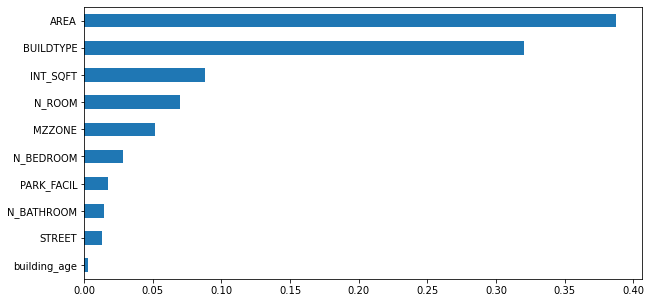

In [174]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_train_scaled,y_train)
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))
# it can be observed from the results that area, buildtype and int-sqft are the most important features in predictingg sales price

In [181]:
pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [182]:
import xgboost as xgb

In [183]:
xx = xgb.XGBRegressor().fit(x_train_scaled,y_train)

[09:15:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [184]:
xgb_reg_pred = xx.predict(x_test_scaled)

In [187]:
metrics.r2_score(y_test, xgb_reg_pred)

0.9918655614470705

CONCLUSION:

The Scores obtained by different regressor models are:

Linear regression model is around 87.94%.

Random Forest model is around 98.41%.

XGB regressor model is around 99.18%.

So from the above observations we can see that XGB Regressor is the suitable model for this dataset.